In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading th MNIST data from keras.datasets

In [ ]:
from os import X_OK
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#Shape of numpy arrays
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#printing 10th Image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


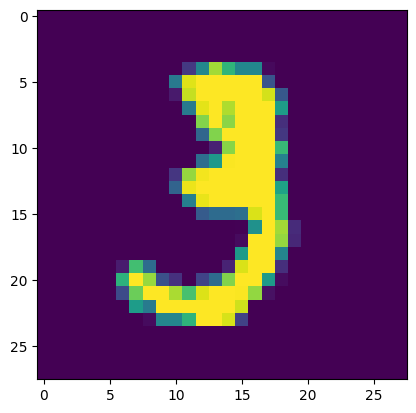

3


In [ ]:
#displaying the Image

plt.imshow(X_train[10])
plt.show()

#print the corresponding label
print(Y_train[10])

In [ ]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#Scaling the values

X_train = X_train/255
X_test = X_test/25

In [ ]:
#Setting layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

In [ ]:
#compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the neural network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2964 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1399 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1041 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0841 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0709 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0548 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0488 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0426 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0

Training Data Accuracy = 98.9%

**Accuracy on Test Data**

In [ ]:
loss , accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.7946 - accuracy: 0.9718
0.9718000292778015


Test data accuracy = 97.1%

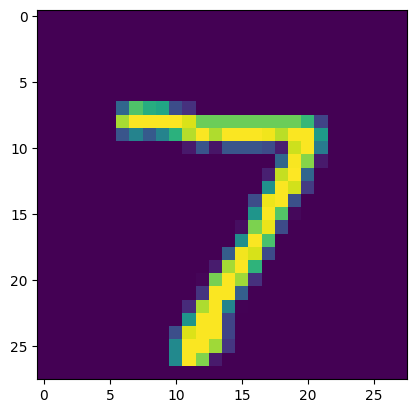

In [ ]:
#First datapoint in X_test

plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[0.00000000e+00 4.22474318e-14 4.60592616e-30 8.42480450e-14
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 1.22606595e-32 2.77317826e-20]


model.predict() gives the prediction of probabililty of each class for that data point

In [ ]:
#converting the prediction probabailities to the class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#converting the prediction probabilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 1, 1, 0, 4, 1, 4, 4, 5, 4, 0, 5, 9, 0, 1, 3, 4, 7, 3, 4, 7, 5, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 2, 1, 1, 1, 1, 1, 4, 2, 3, 5, 1, 2, 4, 4, 5, 3, 5, 5, 5, 0, 4, 1, 4, 5, 3, 2, 9, 2, 7, 4, 6, 4, 3, 0, 7, 0, 2, 7, 1, 3, 3, 2, 4, 7, 7, 6, 2, 7, 8, 4, 7, 3, 4, 1, 3, 6, 4, 3, 1, 4, 1, 7, 5, 9, 5, 0, 5, 4, 5, 4, 2, 1, 9, 4, 8, 1, 3, 9, 2, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 4, 0, 5, 8, 5, 6, 5, 5, 2, 8, 1, 0, 1, 6, 4, 6, 7, 2, 1, 7, 1, 3, 2, 0, 2, 9, 0, 5, 3, 1, 5, 6, 0, 2, 1, 4, 5, 5, 4, 6, 3, 4, 5, 1, 4, 4, 3, 1, 3, 2, 7, 1, 8, 1, 2, 1, 3, 5, 0, 2, 9, 1, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 5, 4, 2, 2, 6, 1, 1, 1, 3, 9, 5, 2, 4, 4, 5, 3, 3, 9, 0, 3, 5, 5, 3, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 5, 8, 7, 7, 2, 1, 4, 1, 3, 9, 8, 2, 2, 2, 0, 2, 4, 1, 4, 1, 4, 5, 7, 2, 1, 3, 2, 0, 2, 5, 7, 7, 4, 1, 8, 1, 2, 0, 3, 0, 1, 8, 3, 4, 1, 8, 2, 1, 1, 4, 2, 5, 9, 2, 5, 4, 1, 5, 4, 1, 9, 2, 0, 4, 0, 0, 1, 8, 4, 7, 1, 2, 4, 0, 1, 7, 4, 2, 3, 0, 0, 3, 1, 9, 5, 5, 2, 5, 1, 2, 9, 3, 0, 4, 1, 0, 7, 1, 1, 1, 1, 

Y_test --> true labels

Y_pred_labels --> Predicted Labels

In [ ]:
#confusion Matrix

conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 973    1    0    1    0    1    1    0    2    1]
 [   0 1132    0    0    0    1    2    0    0    0]
 [  19  353  655    1    2    0    0    2    0    0]
 [   4   20   62  917    1    2    0    2    1    1]
 [  35   46    9    0  890    0    0    1    1    0]
 [   5    2    1  187    3  690    0    1    1    2]
 [  21   29   38    1  119  254  496    0    0    0]
 [   2   96  104   61    9    0    0  753    1    2]
 [   6    4  177  112   10  117   17    8  519    4]
 [  15   13    2   24  200    4    0  163    9  579]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

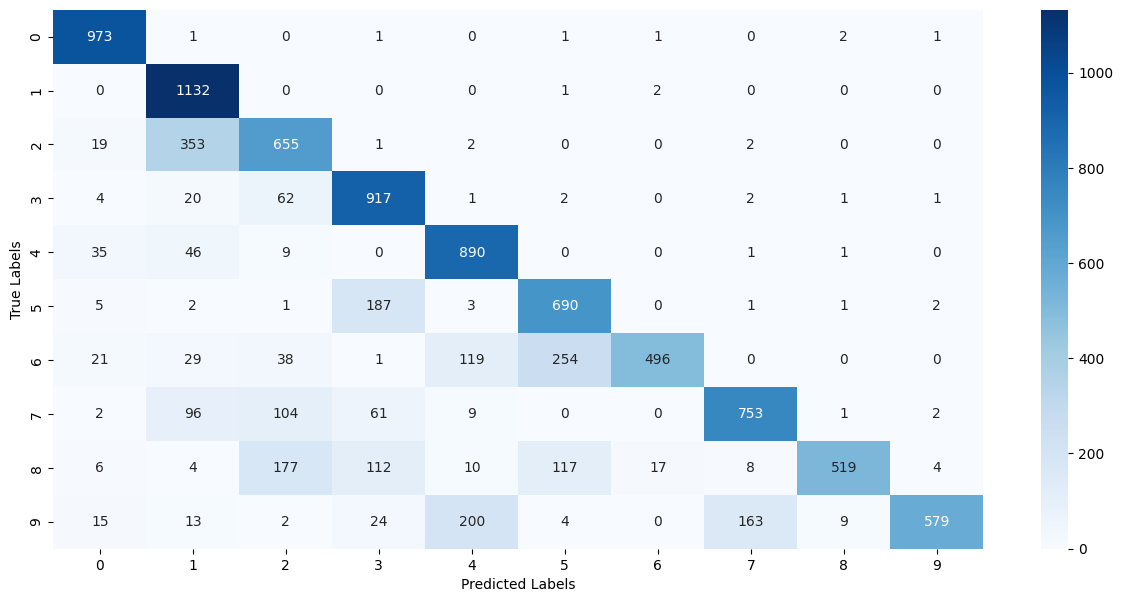

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat,annot = True,fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive system


In [ ]:
input_img_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_img_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


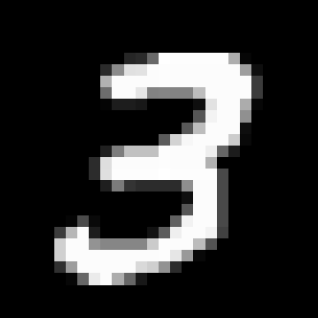

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 89ms/step
[[2.2842343e-11 7.5159282e-05 3.7716571e-05 1.0000000e+00 1.2741193e-13
  3.8767424e-03 7.0979412e-22 5.0712915e-05 2.1012253e-03 3.4902516e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
input_pred_label

3

Predictive System

Path of the image to be predicted: /content/MNIST_digit.png


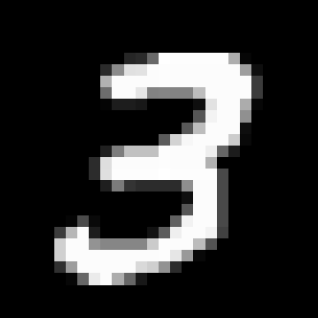

1/1 [==============================] - 0s 37ms/step
The Handwritten Digit is recognised as  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)
